## Day 14 

https://adventofcode.com/2022/day/14

In [1]:
def parse14(filename):
    with open(filename) as f:
        return [ [ tuple([ int(i) for i in  c.split(",")]) for c in l.strip().split(" -> ") ] for l in f.readlines() ]

In [2]:
data0 = parse14("examples/example14.txt")
data = parse14("AOC2022inputs/input14.txt")

In [3]:
from collections import defaultdict

def makeCave(data):
    cave = defaultdict(int)
    for d in data:
        for i in range(len(d)-1):
            x0,y0 = d[i]
            x1,y1 = d[i+1]
            if x0==x1: # vertical
                for y in range(min(y0,y1),max(y0,y1)+1):
                    cave[(x0,y)]=1
            if y0==y1: # horizontal
                for x in range(min(x0,x1),max(x0,x1)+1):
                    cave[(x,y0)]=1
    return cave

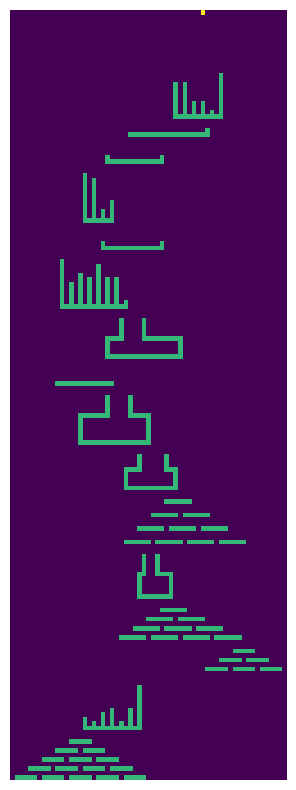

In [4]:
import matplotlib.pyplot as plt
import numpy as np

def cave2array(cave):
    X = [ x for x,y in cave.keys() ]
    Y = [ y for x,y in cave.keys() ]
    xmin = min(X)
    xmax = max(X)
    ymin = min(Y)
    ymax = max(Y)
    caveArray = np.zeros((ymax+1,xmax-xmin+3))
    for x,y in cave.keys():
        caveArray[y][x-xmin+1] = cave[(x,y)]
    caveArray[0][500-xmin+1] = 1.5
    return caveArray

def drawCave(caveEmpty,cave,xmin):
    caveFull = np.copy(caveEmpty)
    for x,y in cave.keys():
        caveFull[y][x-xmin+1] = cave[(x,y)]
    return caveFull

cave = makeCave(data)
cavePlot = cave2array(cave)

plt.figure(figsize=(5,10))
plt.imshow(cavePlot)
_ = plt.axis('off')

In [5]:
from celluloid import Camera

def fillCave(data,part=1,animation=0,figsize=(5,10)):
        
    cave = makeCave(data)
    ymax = max([ y for x,y in cave.keys() ])
    
    xmin = 0
    camera = None
    if animation>0:
        xmin = min([ x for x,y in cave.keys() ])
        fig = plt.figure(figsize=figsize)
        ax = fig.add_axes([0, 0, 1, 1])
        ax.axis('off')
        camera = Camera(fig)
        caveEmpty = cave2array(cave)
        caveEmpty[0][500-xmin+1] = 2 # draw hole
        plt.imshow(caveEmpty)
        plt.axis("off")
        plt.margins(x=0)
        camera.snap()
        
    dropSand = True
    print("Dropping sand...",end=" ")
    while dropSand:
        s = (500,0)
        sandFalling = True
        while sandFalling:
            snew = (s[0],s[1]+1)
            if cave[snew]: # new position blocked
                # try left diagonal
                snew = (s[0]-1,s[1]+1)
                if cave[snew]: # left position blocked
                    # try right diagonal
                    snew = (s[0]+1,s[1]+1)
                    if cave[snew]: # right position blocked
                        cave[s] = 2 # deposit sand
                        sandFalling = False
                    else:
                        s = snew
                else:
                    s = snew
            else:
                s = snew
                
            if part==2 and s[1]==ymax+2:
                #print("Reached cave floor.")
                cave[s]=1 # paint floor under sand grain
                s = (s[0],s[1]-1)
                sandFalling = False   
                
            if part==1 and s[1]>ymax:
                print("Infinite sand flow reached.")
                dropSand = False
                break
                
            if animation==1 or animation==2 and not sandFalling:
                # animation = 1 -> save all frames inclusing dropping sand
                # animation = 2 -> save only frames with sand resting
                caveFrame = drawCave(caveEmpty,cave,xmin)
                if animation==1:
                    caveFrame[s[1]][s[0]-xmin+1] = 2 # draw dropping sand
                caveFrame[0][500-xmin+1] = 1.5
                plt.imshow(caveFrame)
                plt.axis("off")
                plt.margins(x=0)
                camera.snap()
                del caveFrame
                
        if cave[(500,0)]==2:
            print("Hole filled!")
            dropSand = False

    nsand = len([k for k,v in cave.items() if v==2 ])
    print("{} units of sand resting.".format(nsand))
    return nsand,camera

In [6]:
_,_ = fillCave(data0,1)

Dropping sand... Infinite sand flow reached.
24 units of sand resting.


In [7]:
_,_ = fillCave(data,1)

Dropping sand... Infinite sand flow reached.
745 units of sand resting.


In [8]:
_,_ = fillCave(data0,part=2)

Dropping sand... Hole filled!
93 units of sand resting.


In [9]:
_,_ = fillCave(data,part=2)

Dropping sand... Hole filled!
27551 units of sand resting.


## Animations

Dropping sand... Infinite sand flow reached.
24 units of sand resting.


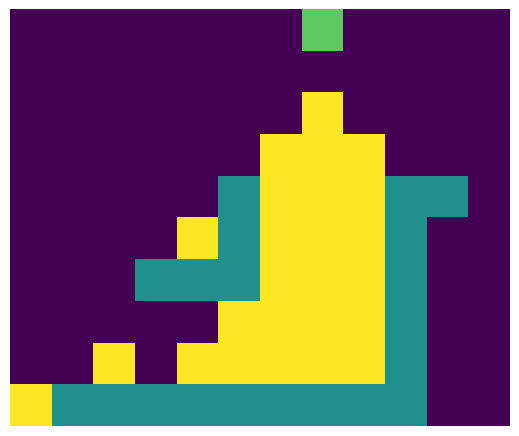

In [10]:
_,camera10 = fillCave(data0,part=1,animation=1,figsize=(5,5))

In [11]:
anim10 = camera10.animate(blit=True)
anim10.save('visualisation/day14animation10.gif', writer='imagemagick',fps=30)
from IPython.display import HTML
HTML(anim10.to_html5_video())

Dropping sand... Infinite sand flow reached.
745 units of sand resting.


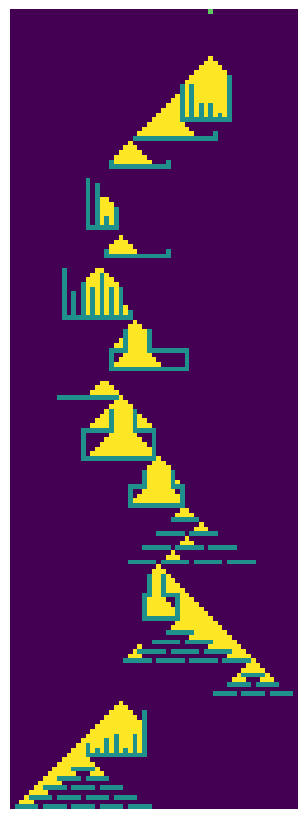

In [16]:
_,camera11 = fillCave(data,part=1,animation=2,figsize=(4,8))

In [17]:
anim11 = camera11.animate(blit=True)

In [18]:
anim11.save('visualisation/day14animation11.gif', writer='imagemagick',fps=30)

In [19]:
from IPython.display import HTML
HTML(anim11.to_html5_video())